#### Import required packages

In [1]:
import sklearn
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


#### Loading Data

In [2]:
telecom = pd.read_csv("files/Telco-Customer-Churn.csv")
telecom.sample(5)
telecom.shape

(7043, 21)

In [3]:
telecom.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4359,9133-AYJZG,Female,0,No,No,23,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),98.70,2249.1,No
4205,6427-FEFIG,Female,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),78.60,1846.65,No
6189,4718-WXBGI,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.95,6614.9,No
2644,2011-TRQYE,Male,0,No,No,18,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),33.50,600,Yes
333,0122-OAHPZ,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,73.85,511.25,Yes


## DATA CLEANING

#### Looking for missing values

In [4]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
telecom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### observation 1 --> 
* total charge dtype is object
* monthly charge data types is int64
* so by looking at sample dataset's total charge colum we did not find any discrepancy
* so trying to fatch total charge column and see what is going insiede

In [6]:
telecom.TotalCharges.values    # values  --> show values only in form of array
# covert DataFrame or DataSeries to array
# not coverting array to any thing


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

##### observation 2
* TotalCharges column has string stored in it
* So converting it to numeric value using pd.to_numeric 

In [7]:
telecom.values

array([['7590-VHVEG', 'Female', 0, ..., 29.85, '29.85', 'No'],
       ['5575-GNVDE', 'Male', 0, ..., 56.95, '1889.5', 'No'],
       ['3668-QPYBK', 'Male', 0, ..., 53.85, '108.15', 'Yes'],
       ...,
       ['4801-JZAZL', 'Female', 0, ..., 29.6, '346.45', 'No'],
       ['8361-LTMKD', 'Male', 1, ..., 74.4, '306.6', 'Yes'],
       ['3186-AJIEK', 'Male', 0, ..., 105.65, '6844.5', 'No']],
      dtype=object)

##### converting to numeric   --> pd.to_numeric(coolumns,  errors = "coerce" )

In [8]:
pd.to_numeric(telecom.TotalCharges, errors= "coerce")  #errors= "coerce"

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

##### # error while converting to_numeric: ValueError: Unable to parse string " " at position 488

In [9]:
telecom.TotalCharges.dtype

dtype('O')

In [10]:
telecom['TotalCharges'].dtype

dtype('O')

In [11]:
telecom.dtypes    # not conveted by above step so assiging methord applying to convert

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
telecom["TotalCharges"] = pd.to_numeric(telecom.TotalCharges, errors= "coerce")
telecom.TotalCharges.dtypes

dtype('float64')

In [13]:
telecom.dtypes    # conveted in root dataset also

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

##### checking missing values in object dtype columns 

In [14]:
for column in telecom:
    if telecom[column].dtype == "O":
        print(column,"\n", telecom[telecom[column] == ""], "\n\n")

customerID 
 Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns] 


gender 
 Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns] 


Partner 
 Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharg

In [15]:
for column in telecom:
    if telecom[column].dtype == "O":
        print("--",column,"--","\n", telecom[telecom[column] != ""], "\n\n")
            

-- customerID -- 
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             N

-- DeviceProtection -- 
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL        

-- PaperlessBilling -- 
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL        

In [16]:
for column in telecom:
    if telecom[column].dtype == "O":
        print("--",column,"--","\n", telecom[telecom[column] != ""].shape, "\n\n")
            

-- customerID -- 
 (7043, 21) 


-- gender -- 
 (7043, 21) 


-- Partner -- 
 (7043, 21) 


-- Dependents -- 
 (7043, 21) 


-- PhoneService -- 
 (7043, 21) 


-- MultipleLines -- 
 (7043, 21) 


-- InternetService -- 
 (7043, 21) 


-- OnlineSecurity -- 
 (7043, 21) 


-- OnlineBackup -- 
 (7043, 21) 


-- DeviceProtection -- 
 (7043, 21) 


-- TechSupport -- 
 (7043, 21) 


-- StreamingTV -- 
 (7043, 21) 


-- StreamingMovies -- 
 (7043, 21) 


-- Contract -- 
 (7043, 21) 


-- PaperlessBilling -- 
 (7043, 21) 


-- PaymentMethod -- 
 (7043, 21) 


-- Churn -- 
 (7043, 21) 




##### Conclusion 3
no column has missing values
we got error for " ", not for ""

### Cheacking Unique Values and value count

1. starting with numeric value

In [17]:
telecom["TotalCharges"].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [18]:
telecom["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [19]:
telecom["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [20]:
pd.DataFrame(telecom["MonthlyCharges"].value_counts(),)

,MonthlyCharges
20.05,61
19.85,45
19.95,44
19.90,44
20.00,43
...,...
114.75,1
103.60,1
113.40,1
57.65,1


###### now cheaking unique values and value_counts for object data type

In [21]:
telecom['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [22]:
for column in telecom:
    if telecom[column].dtype == "O":
        print(f"{column},\n {telecom[column].value_counts()}\n\n")

customerID,
 4737-HOBAX    1
5539-TMZLF    1
0118-JPNOY    1
6145-NNPNO    1
8318-LCNBW    1
             ..
7619-ODSGN    1
0187-WZNAB    1
6296-DDOOR    1
8696-JKZNU    1
6479-SZPLM    1
Name: customerID, Length: 7043, dtype: int64


gender,
 Male      3555
Female    3488
Name: gender, dtype: int64


Partner,
 No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents,
 No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService,
 Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines,
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService,
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity,
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup,
 No                     3088
Yes                    2429
No internet service    1526
Name: On

##### observation 4 :- dataset is skewed so take care of strata while train test split- ""Churn""

In [23]:
for column in telecom:
    if telecom[column].dtype == "object":
        print(telecom[telecom[column] == " "])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0

In [24]:
for column in telecom:
    if telecom[column].dtype == "object":
        print("--",column,"--","\n" ,telecom[telecom[column] == " "].shape, "\n\n")

-- customerID -- 
 (0, 21) 


-- gender -- 
 (0, 21) 


-- Partner -- 
 (0, 21) 


-- Dependents -- 
 (0, 21) 


-- PhoneService -- 
 (0, 21) 


-- MultipleLines -- 
 (0, 21) 


-- InternetService -- 
 (0, 21) 


-- OnlineSecurity -- 
 (0, 21) 


-- OnlineBackup -- 
 (0, 21) 


-- DeviceProtection -- 
 (0, 21) 


-- TechSupport -- 
 (0, 21) 


-- StreamingTV -- 
 (0, 21) 


-- StreamingMovies -- 
 (0, 21) 


-- Contract -- 
 (0, 21) 


-- PaperlessBilling -- 
 (0, 21) 


-- PaymentMethod -- 
 (0, 21) 


-- Churn -- 
 (0, 21) 




## Data Cleaning steps- 
### observations- 
1. no column has missing value including object as well numeric columns 
2. TotalCharges column's dtype is object but it should be converted to_numeric  --> Done already
3. customerId dataset is useless so droping this will be fruitfull  --> Done
4. TotalCharges has " "(single space) values so it need to be dropped as these are few  --> Done
5. for churn and SeniorCitigen(int64) columns data is skewed so take care of strata while train test split

6. columns are
 * Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
 
7. there are multiple object datatype catagorical columns following which has binary values as Yes/No True/False these column need to conceted into 0 - 1 encoded data
    * Columns_To_binary = [gender, Partner, Dependents, PhoneService,  PaperlessBilling, Churn]
    
8. object dtype columns with 3 category are following, these need to be converted/replaces into yes/no then 0 and 1
    * column = [MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies,]
    
9. columns for OneHotEncoding = [Contract, PaymentMethod]

##### 1. dropping customerId coumn

In [25]:
telecom.drop("customerID", axis= "columns", inplace= True)  # droped now getting error no issue

In [26]:
telecom

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


##### 2. removing " "(space) value rows of TotalCharges

In [27]:
telecom[telecom["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [28]:
telecom.dropna(how= "any", inplace = True)  # droping nan values

In [29]:
telecom[telecom["TotalCharges"].isnull()]   # confired drop

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


##### 3. replaceing "No phone service	" and " No internet service	" to no

In [30]:
def get_unique(telecom):
    for column in telecom:
        # if telecom[column].dtype == "O":
            print(f"{column} --> {telecom[column].unique()}")

get_unique(telecom)


gender --> ['Female' 'Male']
SeniorCitizen --> [0 1]
Partner --> ['Yes' 'No']
Dependents --> ['No' 'Yes']
tenure --> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService --> ['No' 'Yes']
MultipleLines --> ['No phone service' 'No' 'Yes']
InternetService --> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --> ['No' 'Yes' 'No internet service']
OnlineBackup --> ['Yes' 'No' 'No internet service']
DeviceProtection --> ['No' 'Yes' 'No internet service']
TechSupport --> ['No' 'Yes' 'No internet service']
StreamingTV --> ['No' 'Yes' 'No internet service']
StreamingMovies --> ['No' 'Yes' 'No internet service']
Contract --> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --> ['Yes' 'No']
PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges --> [

In [31]:
telecom.replace("No internet service", "No", inplace= True)   # replacing
telecom.replace("No phone service", "No", inplace= True)

In [32]:
get_unique(telecom)

gender --> ['Female' 'Male']
SeniorCitizen --> [0 1]
Partner --> ['Yes' 'No']
Dependents --> ['No' 'Yes']
tenure --> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService --> ['No' 'Yes']
MultipleLines --> ['No' 'Yes']
InternetService --> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --> ['No' 'Yes']
OnlineBackup --> ['Yes' 'No']
DeviceProtection --> ['No' 'Yes']
TechSupport --> ['No' 'Yes']
StreamingTV --> ['No' 'Yes']
StreamingMovies --> ['No' 'Yes']
Contract --> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --> ['Yes' 'No']
PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges --> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges --> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn --> ['No' 'Yes']


#### converting yes ?No to 1/0

In [33]:
yes_no_column = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", 
                 "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
                 "StreamingMovies", "PaperlessBilling", "Churn"]

for column in yes_no_column:
    telecom[column].replace({"Yes": 1, "No" : 0}, inplace = True)
    
get_unique(telecom)

gender --> ['Female' 'Male']
SeniorCitizen --> [0 1]
Partner --> [1 0]
Dependents --> [0 1]
tenure --> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService --> [0 1]
MultipleLines --> [0 1]
InternetService --> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --> [0 1]
OnlineBackup --> [1 0]
DeviceProtection --> [0 1]
TechSupport --> [0 1]
StreamingTV --> [0 1]
StreamingMovies --> [0 1]
Contract --> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --> [1 0]
PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges --> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges --> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn --> [0 1]


In [34]:
get_unique(telecom)

gender --> ['Female' 'Male']
SeniorCitizen --> [0 1]
Partner --> [1 0]
Dependents --> [0 1]
tenure --> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService --> [0 1]
MultipleLines --> [0 1]
InternetService --> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --> [0 1]
OnlineBackup --> [1 0]
DeviceProtection --> [0 1]
TechSupport --> [0 1]
StreamingTV --> [0 1]
StreamingMovies --> [0 1]
Contract --> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --> [1 0]
PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges --> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges --> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn --> [0 1]


##### Handling column have 3 classes using one hot

In [35]:
columns_one_hot = ["InternetService", "Contract", "PaymentMethod"]
telecom = pd.get_dummies(data= telecom, columns = columns_one_hot)

###### Converting Female/male  --> 1/0

In [36]:
telecom["gender"].replace({"Female": 1, "Male": 0}, inplace= True)   # converted

In [37]:
telecom.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4201,1,0,1,1,72,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3607,1,0,0,0,13,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
5344,0,0,0,1,71,1,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0


In [38]:
get_unique(telecom)

gender --> [1 0]
SeniorCitizen --> [0 1]
Partner --> [1 0]
Dependents --> [0 1]
tenure --> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService --> [0 1]
MultipleLines --> [0 1]
OnlineSecurity --> [0 1]
OnlineBackup --> [1 0]
DeviceProtection --> [0 1]
TechSupport --> [0 1]
StreamingTV --> [0 1]
StreamingMovies --> [0 1]
PaperlessBilling --> [1 0]
MonthlyCharges --> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges --> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn --> [0 1]
InternetService_DSL --> [1 0]
InternetService_Fiber optic --> [0 1]
InternetService_No --> [0 1]
Contract_Month-to-month --> [1 0]
Contract_One year --> [0 1]
Contract_Two year --> [0 1]
PaymentMethod_Bank transfer (automatic) --> [0 1]
PaymentMethod_Credit card (automatic) --> [0 1]
PaymentMethod_Electronic check --> [1

#####  Exporting Clean Data to CSV file  --> Done so commenting out

In [39]:
#exportcsv = telecom
#exportcsv.index = exportcsv["gender"]
#exportcsv.drop("gender", axis= "columns", inplace= True)


In [41]:
# exportcsv.to_csv("files/telecom_clean.csv")

## Visualization

In [44]:
tenure_churn_yes = telecom[telecom["Churn"] == 1]["tenure"]  # relating tenureship with leaving bussiness
tenure_churn_yes.sample(5
                       )

6137     5
6687     2
289     10
2753     1
4503    17
Name: tenure, dtype: int64

In [45]:
tenure_churn_no = telecom[telecom["Churn"] == 0]["tenure"]
tenure_churn_no.sample(3)

4070    55
5566    72
1779     2
Name: tenure, dtype: int64

Text(0, 0.5, 'Number of Individuals')

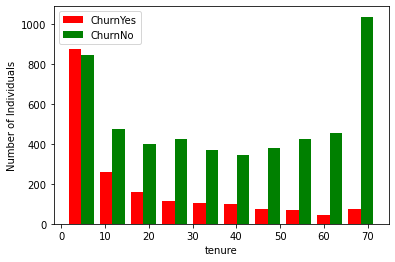

In [46]:
plt.hist([tenure_churn_yes, tenure_churn_no], color= ["red", "green"], label= ["ChurnYes", "ChurnNo"])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("Number of Individuals")

###### Observation 5 --> 
* Customer with less tenure are lefting the service, so target these customer will be fruitfull

In [51]:
charges_churn_no = telecom[telecom["Churn"] == 0]["MonthlyCharges"]
charges_churn_yes = telecom[telecom["Churn"] == 1]["MonthlyCharges"]

Text(0, 0.5, 'Number of Customer Lefting Service')

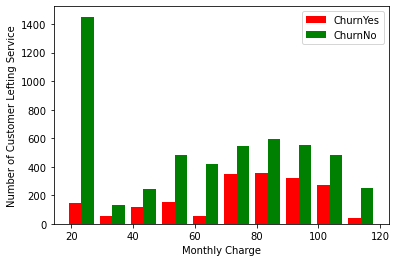

In [54]:
plt.hist([charges_churn_yes, charges_churn_no], color= ["red", "green"], label= ["ChurnYes", "ChurnNo"])
plt.legend()
plt.xlabel("Monthly Charge")
plt.ylabel("Number of Customer Lefting Service")

#### Train-Test-Split

In [58]:
X = telecom.drop("Churn", axis= "columns")
y = telecom["Churn"]

In [61]:
X.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
520,0,0,1,1,67,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
889,1,0,1,1,63,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
281,1,0,0,0,10,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1491,1,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [62]:
y.sample(4)

3420    0
2590    0
429     0
4765    0
Name: Churn, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= telecom["Churn"], random_state=42)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [77]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [78]:
4130/1495

2.762541806020067

In [79]:
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

In [80]:
1033/374

2.7620320855614975

#### Creating Nueral Network

In [95]:
nn_model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (26,), activation= "relu"),  # 12 hidden layer neuron with "relu" activation fn
    keras.layers.Dense(10, activation= "relu"),
    keras.layers.Dense(1, activation= "sigmoid")
])

nn_model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

###### Training the NN

In [98]:
nn_model.fit(X_train, y_train, epochs= 100)

Train on 5625 samples
Epoch 1/100
5625/5625 [==============================] - 1s 145us/sample - loss: 0.6129 - accuracy: 0.7812
Epoch 2/100
5625/5625 [==============================] - 1s 146us/sample - loss: 0.5446 - accuracy: 0.7794
Epoch 3/100
5625/5625 [==============================] - 1s 146us/sample - loss: 0.6349 - accuracy: 0.7813
Epoch 4/100
5625/5625 [==============================] - 1s 117us/sample - loss: 0.6063 - accuracy: 0.7842
Epoch 5/100
5625/5625 [==============================] - 1s 124us/sample - loss: 0.5984 - accuracy: 0.7785
Epoch 6/100
5625/5625 [==============================] - 1s 120us/sample - loss: 0.6581 - accuracy: 0.7684
Epoch 7/100
5625/5625 [==============================] - 1s 117us/sample - loss: 0.5576 - accuracy: 0.7849
Epoch 8/100
5625/5625 [==============================] - 1s 120us/sample - loss: 0.6469 - accuracy: 0.7863
Epoch 9/100
5625/5625 [==============================] - 1s 121us/sample - loss: 0.4821 - accuracy: 0.7847
Epoch 10/100
56

5625/5625 [==============================] - 1s 120us/sample - loss: 0.4813 - accuracy: 0.7868
Epoch 75/100
5625/5625 [==============================] - 1s 119us/sample - loss: 0.4772 - accuracy: 0.7847
Epoch 76/100
5625/5625 [==============================] - 1s 120us/sample - loss: 0.5687 - accuracy: 0.7765
Epoch 77/100
5625/5625 [==============================] - 1s 120us/sample - loss: 0.5810 - accuracy: 0.7810
Epoch 78/100
5625/5625 [==============================] - 1s 120us/sample - loss: 0.5261 - accuracy: 0.7874 - loss: 0.5368 - accuracy: 0.
Epoch 79/100
5625/5625 [==============================] - 1s 119us/sample - loss: 0.5857 - accuracy: 0.7838
Epoch 80/100
5625/5625 [==============================] - 1s 118us/sample - loss: 0.6881 - accuracy: 0.7764
Epoch 81/100
5625/5625 [==============================] - 1s 120us/sample - loss: 0.5640 - accuracy: 0.7860
Epoch 82/100
5625/5625 [==============================] - 1s 119us/sample - loss: 0.5677 - accuracy: 0.7828
Epoch 83/10

###### Evaluateing the model on train and test set

In [100]:
nn_model.evaluate(X_train, y_train)    # evaluating in sample data

5625/5625 [==============================] - 0s 83us/sample - loss: 0.4092 - accuracy: 0.7991


[0.4092432276884715, 0.7991111]

In [101]:
nn_model.evaluate(X_test, y_test)  # evaluation on test set

1407/1407 [==============================] - 0s 80us/sample - loss: 0.4358 - accuracy: 0.7967


[0.4358304055896141, 0.79673064]

##### Conclusion-->
* nn_model is able to predict churn of customer 80% times correctly, it is quit fair

##### COnfusion metrics for precise evaluation for model

In [115]:
y_test_pred = nn_model.predict(X_test)
y_test_pred[:5]

array([[0.01151934],
       [0.5980301 ],
       [0.00511965],
       [0.09638822],
       [0.05678815]], dtype=float32)

In [114]:
y_test[:5]

974     0
619     0
4289    0
3721    1
4533    0
Name: Churn, dtype: int64

In [150]:
y_pred = []
for yp in y_test_pred:
    if yp >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:5]

[0, 1, 0, 0, 0]

In [151]:
type(y_test)

pandas.core.series.Series

In [152]:
type(y_pred)

list

In [153]:
cm = tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: id=281926, shape=(2, 2), dtype=int32, numpy=
array([[879, 154],
       [132, 242]])>

Text(33.0, 0.5, 'Truth')

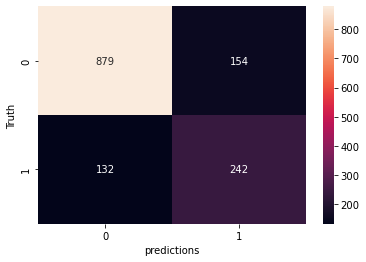

In [154]:
import seaborn as sn
sn.heatmap(cm, annot= True, fmt= "d")
plt.xlabel("predictions")
plt.ylabel("Truth")

## Our bussiness goal is determine potential individual, who can left the service
* so accuracy in detecting of value 1 should be high 
* in this case it is 242/242+132 => 64% 
(Not good enough as per our bussiness requirement)
1. try to achive this by manupulation desion score >

## Classification Report

In [155]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1033
           1       0.61      0.65      0.63       374

    accuracy                           0.80      1407
   macro avg       0.74      0.75      0.74      1407
weighted avg       0.80      0.80      0.80      1407



### Conclusion
1. Recall for 1 is not good score
2. As of now lauching it as it better then random guess

3. Further Tasks
* Try to increase the recall score of 1 by manupulation desion score
* try differed model such as
- SVM
- Logistic Regression
- XGboost
- Desion Tree
- Random Forest

<h1 align="center">LAUNCH IT<h1/>